<a href="https://colab.research.google.com/github/zscialom/RL_Research/blob/heatmaps/Optimal_Policy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import matplotlib
import matplotlib.pyplot as plt  # for plotting
import numpy as np

In [13]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [12]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
ticker='MSFT'
lmbdas= [0.001,0.01, 0.1,0.5] # 0.01

In [117]:
figure_folder_matrix = "/content/drive/Shared drives/ProjectML/Project/Q-matrices/" + ticker  

pis=[]
Qs=[]
Q_stars=[]
for i, lmbda in enumerate(lmbdas):
  q_file_name = 'qmatrix_lmbda_' + str(lmbda) + '.npy'
  path = "%s/%s" % (figure_folder_matrix, q_file_name)
  Q = np.load(path)
  num_blocks, num_prices= np.shape(Q)[0:2]
  pi=np.zeros([num_blocks, num_prices])
  Q_star=np.zeros([num_blocks, num_prices])
  for X in range(num_blocks):
   for M in range(num_prices):
     pi[X,M] = Q[X,M,:].argmax() 
     Q_star[X,M] = Q[X,M,:].max() 
  Qs.append(Q)
  pis.append(pi)  
  Q_stars.append(Q_star) 
  


<ipython-input-116-160b50fa0c7d>:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


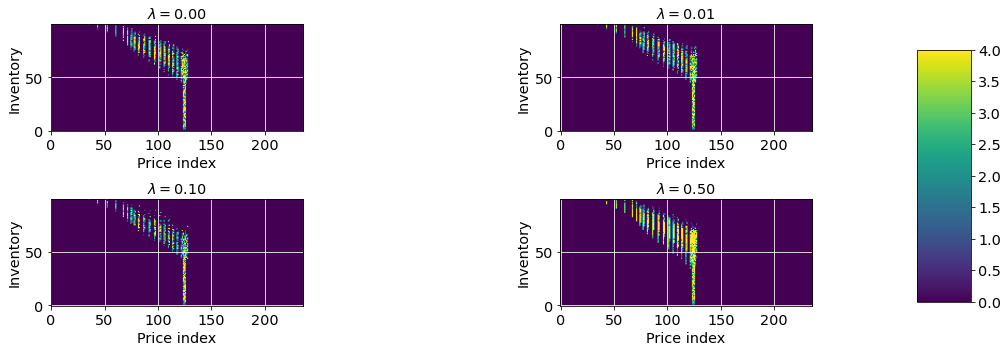

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i,ax in enumerate(axes.flat):
    im = ax.imshow(pis[i], vmin=0, vmax=4)
    ax.invert_yaxis()
    #ax.set_xlim([25,130])
   
    ax.set_title('$\lambda=%2.2f$'%lmbdas[i])
    ax.set_xlabel('Price index')
    ax.set_ylabel('Inventory')
    ax.grid(color='w')


fig.subplots_adjust(right=0.8)
fig.subplots_adjust(hspace=0.7)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.tight_layout()
fig.colorbar(im, cax=cbar_ax)

plt.show()

<ipython-input-118-d7bcead4abb0>:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


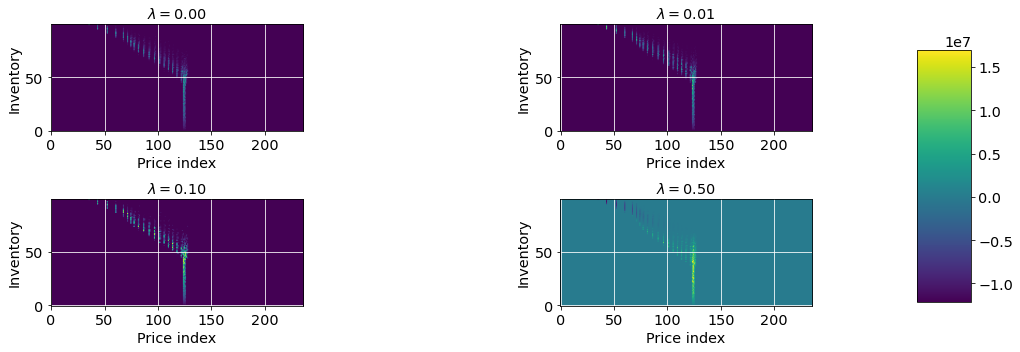

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i,ax in enumerate(axes.flat):
    im = ax.imshow(Q_stars[i]) # vmin=0, vmax=4
    ax.invert_yaxis()
    #ax.set_xlim([25,130])
   
    ax.set_title('$\lambda=%2.2f$'%lmbdas[i])
    ax.set_xlabel('Price index')
    ax.set_ylabel('Inventory')
    ax.grid(color='w')


fig.subplots_adjust(right=0.8)
fig.subplots_adjust(hspace=0.7)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.tight_layout()
fig.colorbar(im, cax=cbar_ax)

plt.show()